### Download the necessary modules

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Import the data in excel file and format them

In [279]:
df_raw =  pd.read_excel('séries_AirLiquide.xlsx')
df_raw.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40
0,1987M03,0.305684,11.1670,NaN
1,1987M04,0.306773,11.8679,NaN
2,1987M05,0.307862,11.3422,NaN
3,1987M06,0.308952,11.0714,NaN
4,1987M07,0.310043,10.9918,NaN
5,1987M08,0.311138,11.1511,1483.02
6,1987M09,0.312236,11.0873,1524.00
7,1987M10,0.313339,10.8962,1456.88
8,1987M11,0.314448,8.5226,1116.47
9,1987M12,0.315563,7.9969,1026.98


In [280]:
df = df_raw
df.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40
0,1987M03,0.305684,11.1670,NaN
1,1987M04,0.306773,11.8679,NaN
2,1987M05,0.307862,11.3422,NaN
3,1987M06,0.308952,11.0714,NaN
4,1987M07,0.310043,10.9918,NaN
5,1987M08,0.311138,11.1511,1483.02
6,1987M09,0.312236,11.0873,1524.00
7,1987M10,0.313339,10.8962,1456.88
8,1987M11,0.314448,8.5226,1116.47
9,1987M12,0.315563,7.9969,1026.98


In [281]:
df['year']=[x.split("M")[0] for x in df['Unnamed: 0']]
df['month']=[x.split("M")[1] for x in df['Unnamed: 0']]
df.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40,year,month
0,1987M03,0.305684,11.1670,NaN,1987,03
1,1987M04,0.306773,11.8679,NaN,1987,04
2,1987M05,0.307862,11.3422,NaN,1987,05
3,1987M06,0.308952,11.0714,NaN,1987,06
4,1987M07,0.310043,10.9918,NaN,1987,07
5,1987M08,0.311138,11.1511,1483.02,1987,08
6,1987M09,0.312236,11.0873,1524.00,1987,09
7,1987M10,0.313339,10.8962,1456.88,1987,10
8,1987M11,0.314448,8.5226,1116.47,1987,11
9,1987M12,0.315563,7.9969,1026.98,1987,12


In [282]:
# Compute the different monthly returns
df['return_price'] = np.log(df['Prix Airliquide']/df['Prix Airliquide'].shift(1)) # p(t)/p(t-1)
df['return_CAC40'] = np.log(df['Indice CAC40']/df['Indice CAC40'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df.head(24)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40,year,month,return_price,return_CAC40
0,1987M03,0.305684,11.1670,NaN,1987,03,NaN,NaN
1,1987M04,0.306773,11.8679,NaN,1987,04,0.060874,NaN
2,1987M05,0.307862,11.3422,NaN,1987,05,-0.045307,NaN
3,1987M06,0.308952,11.0714,NaN,1987,06,-0.024165,NaN
4,1987M07,0.310043,10.9918,NaN,1987,07,-0.007216,NaN
5,1987M08,0.311138,11.1511,1483.02,1987,08,0.014389,NaN
6,1987M09,0.312236,11.0873,1524.00,1987,09,-0.005738,0.027258
7,1987M10,0.313339,10.8962,1456.88,1987,10,-0.017386,-0.045041
8,1987M11,0.314448,8.5226,1116.47,1987,11,-0.245693,-0.266125
9,1987M12,0.315563,7.9969,1026.98,1987,12,-0.063667,-0.083549


In [283]:
def calculate_beta(df,year):
    ret_price_year = df['return_price'][df['year'] == year]
    ret_CAC_40_year = df['return_CAC40'][df['year'] == year]

    x = ret_price_year.values
    y = ret_CAC_40_year.values

    cov_matrix = np.cov(x,y)
    var_y = np.cov(y) #unbiased estimator
    cov_xy = cov_matrix[1,0]
    beta_xy = cov_xy/var_y
    
    return beta_xy

In [284]:
# Beta computation - to be used for comparison later
beta_estimated = []
years = df['year'].unique()
for year in years :
    beta_estimated.append(calculate_beta(df,year))

In [285]:
# Change to annual values
df_yearly = pd.DataFrame() 

dividend_yearly = df.groupby('year')['Div AirLiquide (lissé)'].mean().round(3)
df_yearly['Dividend'] = dividend_yearly

price_yearly = df.groupby('year')['Prix Airliquide'].mean().round(3)
df_yearly['Price'] =  price_yearly

indiceCAC40_yearly = df.groupby('year')['Indice CAC40'].mean().round(3)
df_yearly['CAC40_basis_points']  = indiceCAC40_yearly

df_yearly.head(10)

,Dividend,Price,CAC40_basis_points
year,,,
1987,0.311,10.609,1321.470
1988,0.323,8.497,1229.658
1989,0.336,10.926,1750.667
1990,0.350,12.387,1859.954
1991,0.371,12.834,1764.264
1992,0.398,14.827,1846.913
1993,0.425,16.328,2012.700
1994,0.448,17.275,2065.525
1995,0.469,18.181,1869.042


In [286]:
# Calculate the necessary rates 
df_yearly['Dividend_Rate'] = np.log(df_yearly['Dividend']/df_yearly['Dividend'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df_yearly['return_price'] = np.log(df_yearly['Price']/df_yearly['Price'].shift(1)) # p(t)/p(t-1)
df_yearly['return_CAC40'] = np.log(df_yearly['CAC40_basis_points']/df_yearly['CAC40_basis_points'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df_yearly

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40
year,,,,,,
1987,0.311,10.609,1321.470,NaN,NaN,NaN
1988,0.323,8.497,1229.658,0.037859,-0.221990,-0.072009
1989,0.336,10.926,1750.667,0.039459,0.251432,0.353261
1990,0.350,12.387,1859.954,0.040822,0.125502,0.060555
1991,0.371,12.834,1764.264,0.058269,0.035450,-0.052818
1992,0.398,14.827,1846.913,0.070250,0.144352,0.045782
1993,0.425,16.328,2012.700,0.065637,0.096432,0.085962
1994,0.448,17.275,2065.525,0.052704,0.056379,0.025907
1995,0.469,18.181,1869.042,0.045810,0.051117,-0.099958


In [287]:
# Load french treasuries bonds and beta
french_treasuries_bonds =  pd.read_excel('tx_dintéret_OAT.xlsx',sheet_name = 'Final', header = None)
french_treasuries_bonds.columns = ['year','french_bonds_rate']
french_treasuries_bonds['year'] = french_treasuries_bonds['year'].astype(str)
french_treasuries_bonds.set_index('year', inplace = True)
print(french_treasuries_bonds)

beta =  pd.read_excel('beta_Air_liquide_good_version.xlsx', header = None)
beta.columns = ['year','beta']
beta['year'] = beta['year'].astype(str)
beta.set_index('year', inplace = True)
print(beta)

      french_bonds_rate
year                   
1999           3.410000
2000           0.700000
2001           3.280000
2002           3.310000
2003           2.450000
2004           2.370000
2005           4.210000
2006           2.910000
2007           1.875000
2008           4.234325
2009           3.648817
2010           3.117017
2011           3.321058
2012           2.535992
2013           2.204350
2014           1.666442
2015           0.841858
2016           0.467883
2017           0.809858
2018           0.784108
2019           0.130200
2020          -0.145267
2021           0.007367
2022           1.700833
       beta
year       
1999  0.800
2000  0.990
2001  0.960
2002  0.880
2003  0.540
2004  0.190
2005  0.960
2006  0.810
2007  0.360
2008  0.400
2009  0.660
2010  0.455
2011  0.414
2012  0.600
2013  0.332
2014  0.550
2015  0.250
2016  0.500
2017  0.650
2018  0.740
2019  0.910
2020  0.730
2021  0.810
2022  1.010


In [288]:
# Concatenate the data since they are defined on the same period
df_beta_bond = pd.concat([beta, french_bonds_rate], axis=1)
df_beta_bond

,beta,french_bonds_rate
year,,
1999,0.800,3.410000
2000,0.990,0.700000
2001,0.960,3.280000
2002,0.880,3.310000
2003,0.540,2.450000
2004,0.190,2.370000
2005,0.960,4.210000
2006,0.810,2.910000
2007,0.360,1.875000


### Now we need to cross the intervals of time with data available from both dataframes. in our case, the data are fine between 1999 and 2020

In [289]:
df_beta_bond.drop(['2021', '2022'], axis = 0, inplace = True)
df_beta_bond

,beta,french_bonds_rate
year,,
1999,0.800,3.410000
2000,0.990,0.700000
2001,0.960,3.280000
2002,0.880,3.310000
2003,0.540,2.450000
2004,0.190,2.370000
2005,0.960,4.210000
2006,0.810,2.910000
2007,0.360,1.875000


In [290]:
df_yearly.iloc[:12,:].index

Index(['1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998'],
      dtype='object', name='year')

In [291]:
df_yearly.drop(df_yearly.iloc[:12,:].index, axis = 0, inplace = True)
df_yearly

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40
year,,,,,,
1999,0.655,27.822,4464.609,0.121607,0.047400,0.198865
2000,0.752,29.066,6353.173,0.138101,0.043742,0.352773
2001,0.870,32.785,5085.517,0.145757,0.120402,-0.222558
2002,0.979,33.140,3866.780,0.118038,0.010770,-0.273975
2003,1.038,30.311,3115.573,0.058519,-0.089230,-0.216009
2004,1.027,33.690,3699.040,-0.010654,0.105690,0.171660
2005,0.988,37.058,4247.107,-0.038715,0.095283,0.138165
2006,1.009,44.525,5095.468,0.021032,0.183567,0.182113
2007,1.103,52.345,5752.749,0.089074,0.161806,0.121326


In [292]:
df_yearly_final = pd.concat([df_yearly, df_beta_bond], axis=1)
df_yearly_final

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40,beta,french_bonds_rate
year,,,,,,,,
1999,0.655,27.822,4464.609,0.121607,0.047400,0.198865,0.800,3.410000
2000,0.752,29.066,6353.173,0.138101,0.043742,0.352773,0.990,0.700000
2001,0.870,32.785,5085.517,0.145757,0.120402,-0.222558,0.960,3.280000
2002,0.979,33.140,3866.780,0.118038,0.010770,-0.273975,0.880,3.310000
2003,1.038,30.311,3115.573,0.058519,-0.089230,-0.216009,0.540,2.450000
2004,1.027,33.690,3699.040,-0.010654,0.105690,0.171660,0.190,2.370000
2005,0.988,37.058,4247.107,-0.038715,0.095283,0.138165,0.960,4.210000
2006,1.009,44.525,5095.468,0.021032,0.183567,0.182113,0.810,2.910000
2007,1.103,52.345,5752.749,0.089074,0.161806,0.121326,0.360,1.875000


## Estimation of the model

### We will use the Least Square Error Method to find the coefficients from the linearization Y = A*G + U

In [293]:
dividend = df_yearly_final['Dividend']
dividend_rate = df_yearly_final['Dividend_Rate']
price = df_yearly_final['Price']
return_CAC40 = df_yearly_final['return_CAC40']
french_bonds_rate = df_yearly_final['french_bonds_rate']
beta = df_yearly_final['beta']

#### 1st approach : we consider A0 unknown 

In [294]:
Y1 = (dividend.shift(-1)/price)-french_bonds_rate
Y2 = beta*(return_CAC40 - french_bonds_rate)
Y = Y1 - Y2
gt = dividend_rate
print(Y)
print(gt)

year
1999   -0.814063
2000   -0.326313
2001    0.112317
2002   -0.124781
2003   -0.976473
2004   -1.922989
2005   -0.273811
2006   -0.675639
2007   -1.220218
2008   -2.415943
2009   -1.002899
2010   -1.728660
2011   -1.910008
2012   -0.933579
2013   -1.500766
2014   -0.774267
2015   -0.635020
2016   -0.164277
2017   -0.357935
2018   -0.199364
2019   -0.000728
2020         NaN
dtype: float64
year
1999    0.121607
2000    0.138101
2001    0.145757
2002    0.118038
2003    0.058519
2004   -0.010654
2005   -0.038715
2006    0.021032
2007    0.089074
2008    0.107353
2009    0.088774
2010    0.068397
2011    0.068575
2012    0.072668
2013    0.069436
2014    0.061221
2015    0.056186
2016    0.049387
2017    0.048427
2018    0.051816
2019    0.046383
2020    0.026430
Name: Dividend_Rate, dtype: float64


In [295]:
# Get rid of the nan values
Y=Y[:-1]
gt=gt[:-1]

Y=np.array(Y.values)
Y=np.transpose(Y)
G=np.array([np.ones(len(gt)),gt.values])
G=np.transpose(G)
print(Y)
print(G)
print(Y.shape)
print(G.shape)

[-8.14063210e-01 -3.26313126e-01  1.12316587e-01 -1.24780707e-01
 -9.76473032e-01 -1.92298924e+00 -2.73810541e-01 -6.75639313e-01
 -1.22021773e+00 -2.41594339e+00 -1.00289947e+00 -1.72866042e+00
 -1.91000832e+00 -9.33579260e-01 -1.50076574e+00 -7.74267100e-01
 -6.35020368e-01 -1.64277181e-01 -3.57935133e-01 -1.99364257e-01
 -7.27565491e-04]
[[ 1.          0.12160713]
 [ 1.          0.13810109]
 [ 1.          0.14575689]
 [ 1.          0.11803843]
 [ 1.          0.05851942]
 [ 1.         -0.01065385]
 [ 1.         -0.03871451]
 [ 1.          0.02103232]
 [ 1.          0.089074  ]
 [ 1.          0.10735309]
 [ 1.          0.08877421]
 [ 1.          0.06839657]
 [ 1.          0.06857525]
 [ 1.          0.07266815]
 [ 1.          0.06943588]
 [ 1.          0.0612213 ]
 [ 1.          0.05618587]
 [ 1.          0.04938672]
 [ 1.          0.04842659]
 [ 1.          0.05181589]
 [ 1.          0.04638268]]
(21,)
(21, 2)


In [296]:
 # Use results from Least Square Error to find the coefficient vector A from the linearization Y = A*G + U
A_1st_part = np.linalg.inv(np.matmul(np.transpose(G),G)) # (inverse of G transpose times G)
A_2nd_part = np.matmul(np.transpose(G),Y) # (G transpose times Y)
A=np.matmul(A_1st_part,A_2nd_part)
A

array([-0.91142376,  0.90435644])

Text(0, 0.5, 'Y term containing the future price')

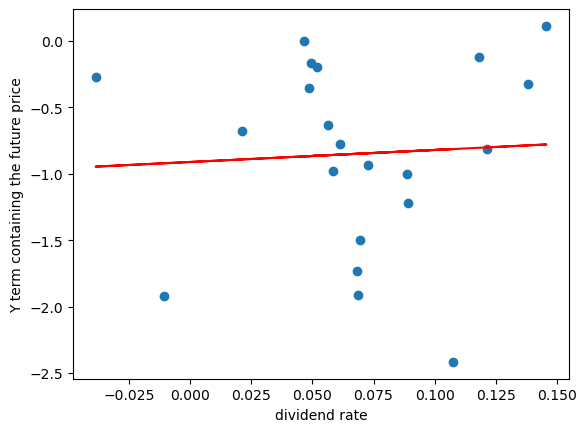

In [297]:
# check graphically the coefficients are good
A0 = A[0]
A1 = A[1]
X = gt.values
Y_pred = A0 + A1*X


plt.scatter(X,Y, label = 'actual values')
plt.plot(X,Y_pred, '-r', label = 'fitted values')
plt.xlabel('dividend rate')
plt.ylabel('Y term containing the future price')

#### 2nd approach: we suppose A0 is known and depends on the average rate

In [298]:
Y = (dividend.shift(-1)/price)-french_bonds_rate
gt = dividend_rate

##### 1st step: use as a hypothesis that A0 is the mean of market risk premium on all our study of period

In [299]:
# Reshape the input and output
A0_estimate = beta*(return_CAC40-french_bonds_rate)
A0_estimate = A0_estimate.mean()
Y_prime = Y - A0_estimate

Y = Y[:-1] # remove the nan value as seen before
Y_prime = Y_prime[:-1] # remove the nan value as seen before
gt = gt[:-1] # remove the nan value as seen before
print(A0_estimate)
print(Y_prime)
print(gt)

-1.3501580430517608
year
1999   -2.032813
2000    0.680090
2001   -1.899981
2002   -1.928520
2003   -1.065960
2004   -0.990516
2005   -2.832614
2006   -1.535069
2007   -0.501382
2008   -2.857889
2009   -2.264714
2010   -1.739476
2011   -1.944317
2012   -1.159242
2013   -0.827929
2014   -0.289843
2015    0.531308
2016    0.910446
2017    0.566085
2018    0.591156
2019    1.243008
dtype: float64
year
1999    0.121607
2000    0.138101
2001    0.145757
2002    0.118038
2003    0.058519
2004   -0.010654
2005   -0.038715
2006    0.021032
2007    0.089074
2008    0.107353
2009    0.088774
2010    0.068397
2011    0.068575
2012    0.072668
2013    0.069436
2014    0.061221
2015    0.056186
2016    0.049387
2017    0.048427
2018    0.051816
2019    0.046383
Name: Dividend_Rate, dtype: float64


In [300]:
# Apply LSE to compute the coefficient A1
numerator_A1_estimate = sum((Y_prime-Y_prime.mean())*(gt-gt.mean()))
denominator_A1_estimate = sum(pow(gt.values-gt.mean(),2))
A1_estimate = numerator_A1_estimate / denominator_A1_estimate
print(numerator_A1_estimate)
print(denominator_A1_estimate)
print(A1_estimate)

-0.08729020292672356
0.04030059978909854
-2.1659777617090423


In [301]:
# Check if the coefficients are consistent 
A0_prime = Y_prime.mean() - A1_estimate*gt.mean()
print(A0_prime)
print(A0_estimate)
print(A1_estimate)

-0.773706135076055
-1.3501580430517608
-2.1659777617090423


21
21
21


Text(0, 0.5, 'Y term containing the future price')

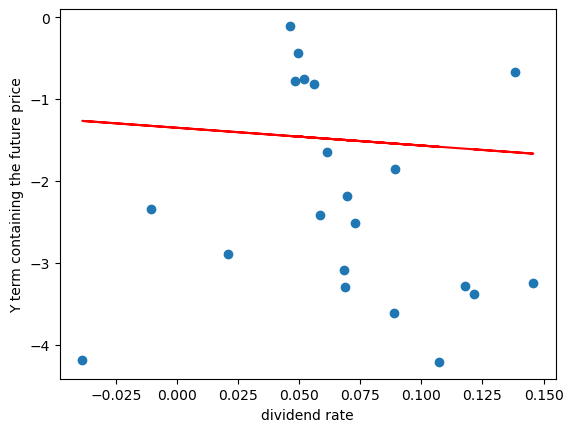

In [302]:
# check graphically the coefficients are good
X = gt.values
Y_pred = A0_estimate + A1_estimate*X

print(len(X))
print(len(Y_pred))
print(len(Y))
plt.scatter(X,Y, label = 'actual values')
plt.plot(X,Y_pred, '-r', label = 'fitted values')
plt.xlabel('dividend rate')
plt.ylabel('Y term containing the future price')

##### 2ns step: Check if the hypothesis on the mean is correct by applying the Least Square Error Method directly

In [303]:
Y = (dividend.shift(-1)/price)-french_bonds_rate
gt = dividend_rate

# Get rid of the nan values
Y=Y[:-1]
gt=gt[:-1]

Y=np.array(Y.values)
Y=np.transpose(Y)
G=np.array([np.ones(len(gt)),gt.values])
G=np.transpose(G)

 # Use results from Least Square Error to find the coefficient vector A from the linearization Y = A*G + U
A_1st_part = np.linalg.inv(np.matmul(np.transpose(G),G)) # (inverse of G transpose times G)
A_2nd_part = np.matmul(np.transpose(G),Y) # (G transpose times Y)
A=np.matmul(A_1st_part,A_2nd_part)
A0 = A[0]
A1 = A[1]
print(A0_estimate)
print(A0)
print(A1)

-1.3501580430517608
-2.123864178127816
-2.1659777617090583


Text(0, 0.5, 'Y term containing the future price')

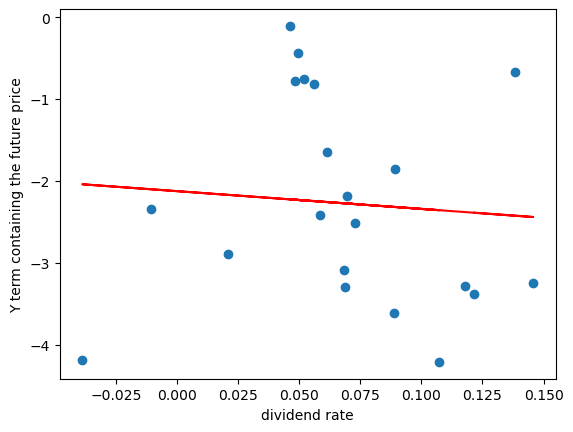

In [304]:
# check graphically the coefficients are good
X = gt.values
Y_pred = A0 + A1*X

plt.scatter(X,Y, label = 'actual values')
plt.plot(X,Y_pred, '-r', label = 'fitted values')
plt.xlabel('dividend rate')
plt.ylabel('Y term containing the future price')

In [305]:
from sklearn.metrics import r2_score
score_r2 = r2_score(Y, Y_pred)
print(score_r2)

0.0058374849717565125


In [306]:
(1-score_r2)/(len(Y)-2)

0.05232434289622334

In [307]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept=False)
lm.fit(G, Y)

LinearRegression(fit_intercept=False)

In [308]:
print(lm.coef_)
print(lm.intercept_)
print(lm.score(G, Y))

[-2.12386418 -2.16597776]
0.0
0.0058374849717565125
